In [42]:
# %pip install scikit-learn

In [43]:
import pandas as pd

df = pd.read_csv('dataset/refined_data.csv')

In [44]:
from sklearn.model_selection import train_test_split

target = df['HeartDisease'].values
features = df[df.columns.drop(['HeartDisease'])].values
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size = 0.20)

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score, RocCurveDisplay, f1_score
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

def evaluate(classifier):
    classifier.fit(x_train, y_train)
    y_pred = classifier.predict(x_test)
    report = classification_report(y_test, y_pred)
    print(report)

    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()

    cv = cross_val_score(classifier, x_train, y_train)
    print(f"Cross Validation (mean ± std): {cv.mean()*100:.2f}% ± {cv.std()*100:.2f}%")

    y_proba = classifier.predict_proba(x_test)[:, 1]
    roc_auc = roc_auc_score(y_test, y_proba)
    print(f"ROC AUC Score: {roc_auc*100:.2f}%")

    f1 = f1_score(y_test, y_pred)
    print(f"F1 Score: {f1*100:.2f}%")

    RocCurveDisplay.from_predictions(y_test, y_proba)
    plt.title("ROC Curve")
    plt.show()

    return {"report": report, "cv": cv, "roc_auc": roc_auc, "f1": f1}


Kernel: linear
              precision    recall  f1-score   support

           0       0.82      0.82      0.82        80
           1       0.87      0.87      0.87       104

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Cross Validation (mean ± std): 85.83% ± 5.08%
ROC AUC Score: 88.94%
F1 Score: 86.54%


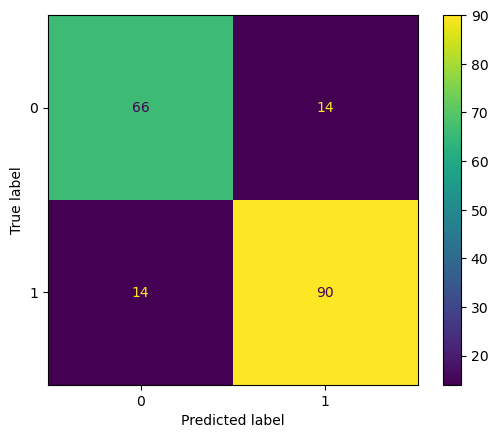

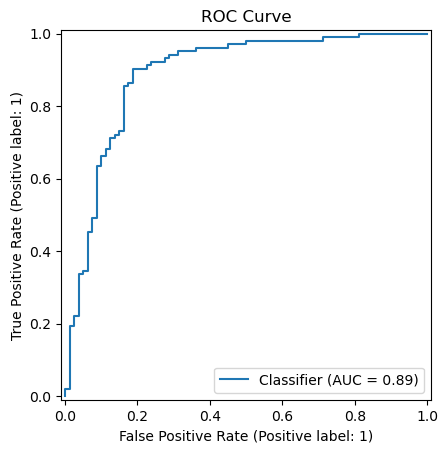

Kernel: Sigmoid
              precision    recall  f1-score   support

           0       0.80      0.49      0.60        80
           1       0.70      0.90      0.79       104

    accuracy                           0.72       184
   macro avg       0.75      0.70      0.70       184
weighted avg       0.74      0.72      0.71       184

Cross Validation (mean ± std): 75.20% ± 4.55%
ROC AUC Score: 86.05%
F1 Score: 78.66%


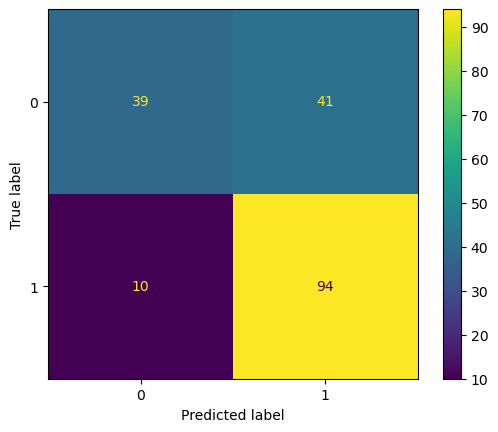

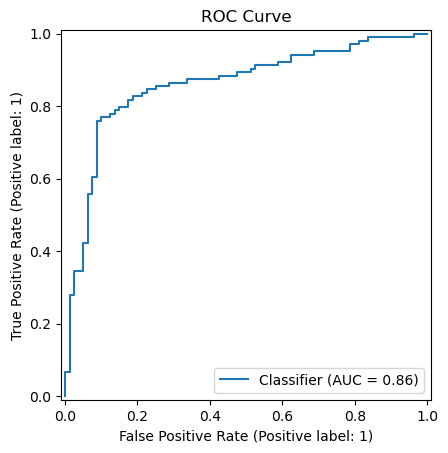

Kernel: rbf
              precision    recall  f1-score   support

           0       0.90      0.78      0.83        80
           1       0.84      0.93      0.89       104

    accuracy                           0.86       184
   macro avg       0.87      0.85      0.86       184
weighted avg       0.87      0.86      0.86       184

Cross Validation (mean ± std): 84.88% ± 4.23%
ROC AUC Score: 90.77%
F1 Score: 88.58%


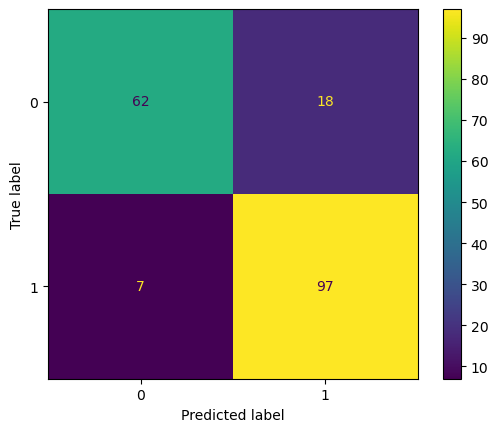

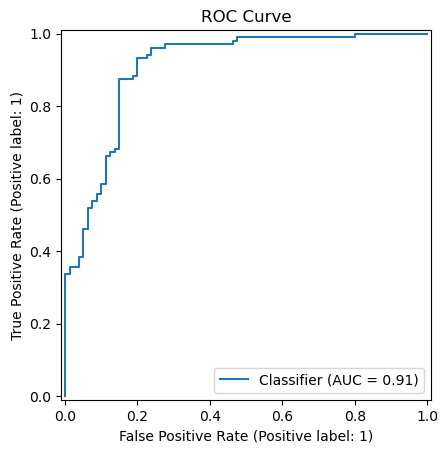

Kernel: Poly
              precision    recall  f1-score   support

           0       0.90      0.81      0.86        80
           1       0.87      0.93      0.90       104

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.88       184
weighted avg       0.88      0.88      0.88       184

Cross Validation (mean ± std): 85.83% ± 2.77%
ROC AUC Score: 90.41%
F1 Score: 89.81%


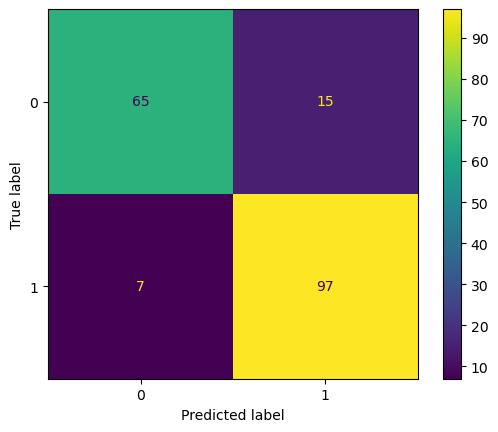

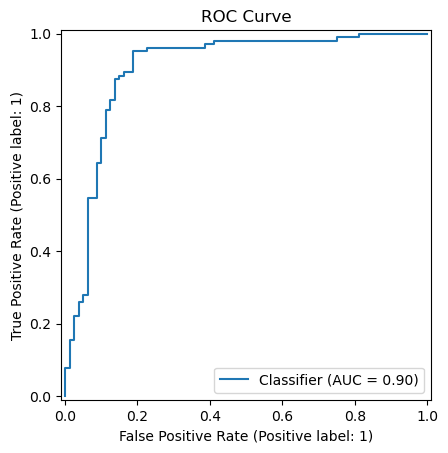

In [46]:
from sklearn.svm import SVC

kernel = []
print("Kernel: linear")
classifier = SVC(kernel='linear', probability=True)
kernel.append(evaluate(classifier)["f1"])

print("Kernel: Sigmoid")
classifier = SVC(kernel='sigmoid', probability=True)
kernel.append(evaluate(classifier)["f1"])

print("Kernel: rbf")
classifier = SVC(kernel='rbf', probability=True)
kernel.append(evaluate(classifier)["f1"])

print("Kernel: Poly")
classifier = SVC(kernel='poly', probability=True)
kernel.append(evaluate(classifier)["f1"])

C: 0.1
              precision    recall  f1-score   support

           0       0.84      0.76      0.80        80
           1       0.83      0.88      0.86       104

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.83       184
weighted avg       0.83      0.83      0.83       184

Cross Validation (mean ± std): 83.65% ± 6.59%
ROC AUC Score: 90.42%
F1 Score: 85.58%


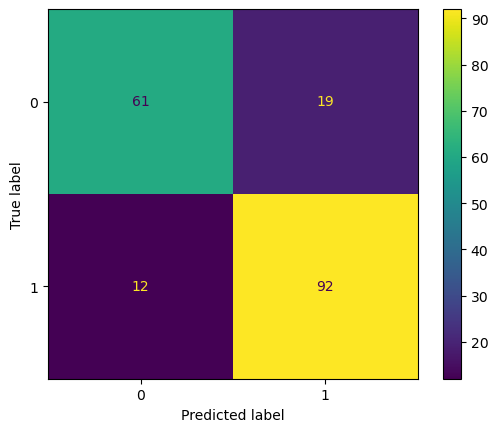

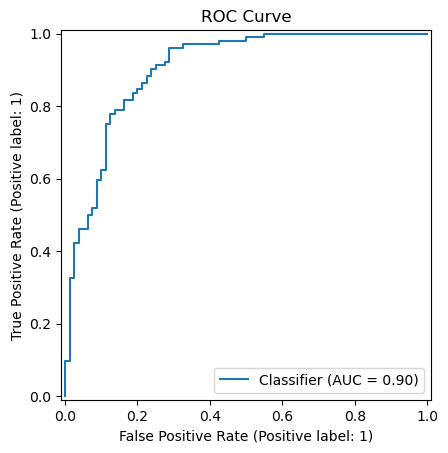

C: 1
              precision    recall  f1-score   support

           0       0.90      0.78      0.83        80
           1       0.84      0.93      0.89       104

    accuracy                           0.86       184
   macro avg       0.87      0.85      0.86       184
weighted avg       0.87      0.86      0.86       184

Cross Validation (mean ± std): 84.88% ± 4.23%
ROC AUC Score: 90.77%
F1 Score: 88.58%


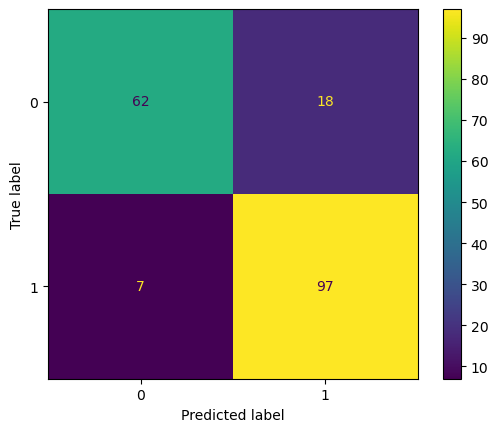

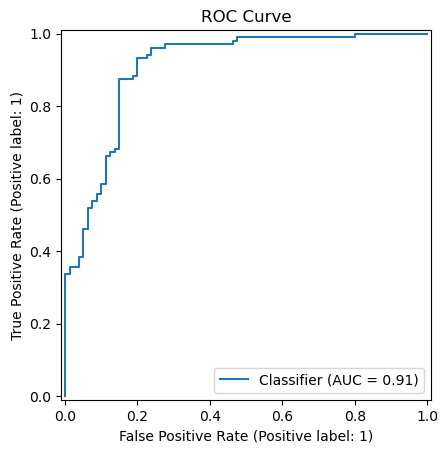

C: 10
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        80
           1       0.86      0.91      0.89       104

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184

Cross Validation (mean ± std): 85.42% ± 4.12%
ROC AUC Score: 91.08%
F1 Score: 88.79%


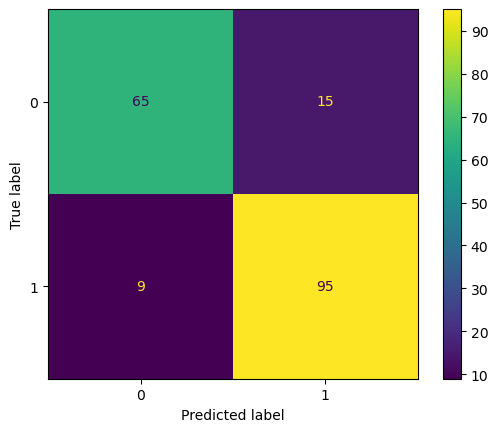

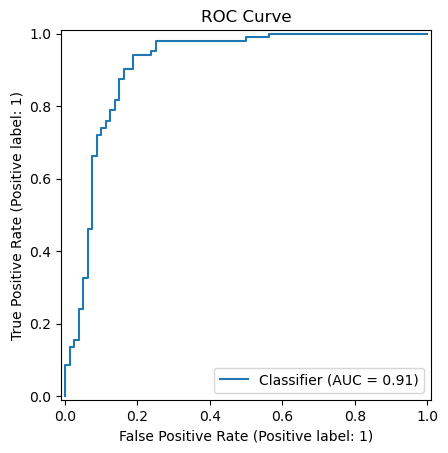

C: 100
              precision    recall  f1-score   support

           0       0.88      0.79      0.83        80
           1       0.85      0.91      0.88       104

    accuracy                           0.86       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.86      0.86      0.86       184

Cross Validation (mean ± std): 83.24% ± 3.88%
ROC AUC Score: 89.71%
F1 Score: 87.96%


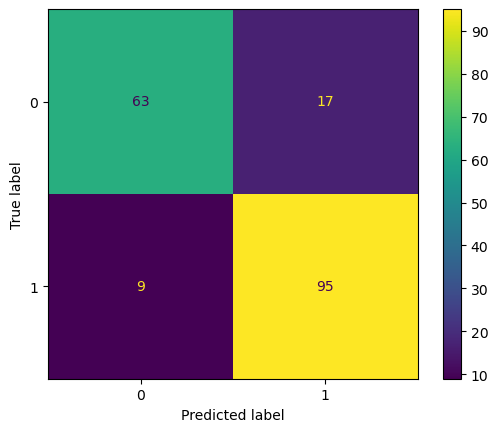

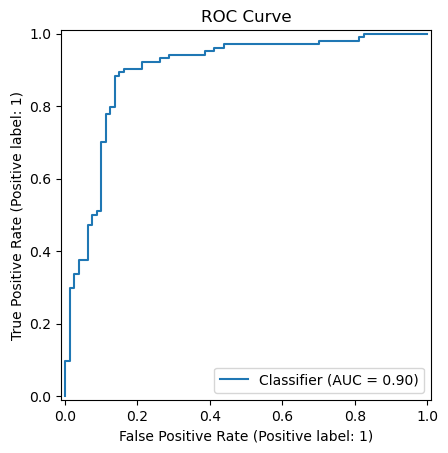

{'report': '              precision    recall  f1-score   support\n\n           0       0.88      0.79      0.83        80\n           1       0.85      0.91      0.88       104\n\n    accuracy                           0.86       184\n   macro avg       0.86      0.85      0.85       184\nweighted avg       0.86      0.86      0.86       184\n',
 'cv': array([0.78231293, 0.8707483 , 0.81632653, 0.88435374, 0.80821918]),
 'roc_auc': np.float64(0.8971153846153845),
 'f1': 0.8796296296296297}

In [47]:
print("C: 0.1")
classifier = SVC(C=0.1, kernel='rbf', probability=True)
evaluate(classifier)

print("C: 1")
classifier = SVC(C=1, kernel='rbf', probability=True)
evaluate(classifier)

print("C: 10")
classifier = SVC(C=10, kernel='rbf', probability=True)
evaluate(classifier)

print("C: 100")
classifier = SVC(C=100, kernel='rbf', probability=True)
evaluate(classifier)


C: 0.1
              precision    recall  f1-score   support

           0       0.84      0.76      0.80        80
           1       0.83      0.88      0.86       104

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.83       184
weighted avg       0.83      0.83      0.83       184

Cross Validation (mean ± std): 83.65% ± 6.59%
ROC AUC Score: 90.42%
F1 Score: 85.58%


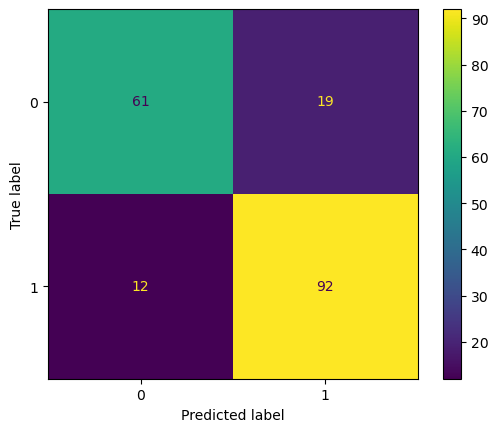

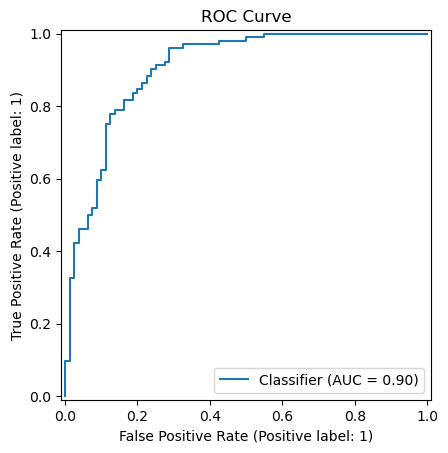

C: 1
              precision    recall  f1-score   support

           0       0.90      0.78      0.83        80
           1       0.84      0.93      0.89       104

    accuracy                           0.86       184
   macro avg       0.87      0.85      0.86       184
weighted avg       0.87      0.86      0.86       184

Cross Validation (mean ± std): 84.88% ± 4.23%
ROC AUC Score: 90.77%
F1 Score: 88.58%


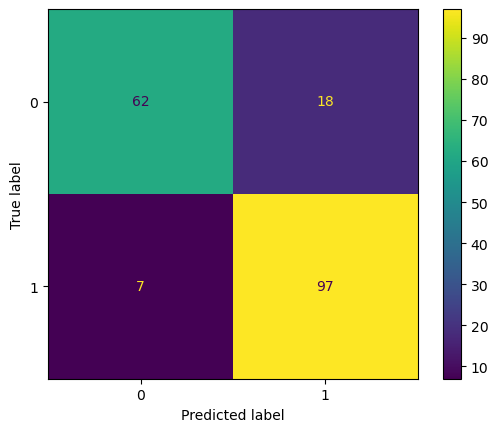

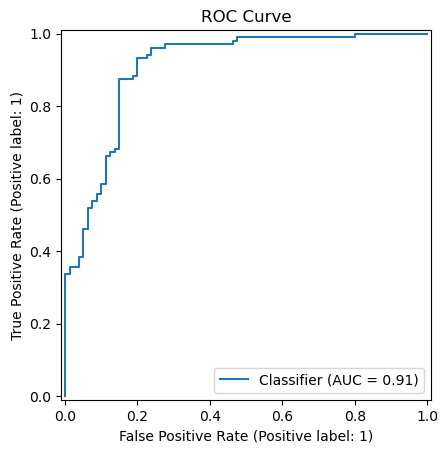

C: 2
              precision    recall  f1-score   support

           0       0.91      0.80      0.85        80
           1       0.86      0.94      0.90       104

    accuracy                           0.88       184
   macro avg       0.89      0.87      0.88       184
weighted avg       0.88      0.88      0.88       184

Cross Validation (mean ± std): 85.15% ± 3.79%
ROC AUC Score: 91.18%
F1 Score: 89.91%


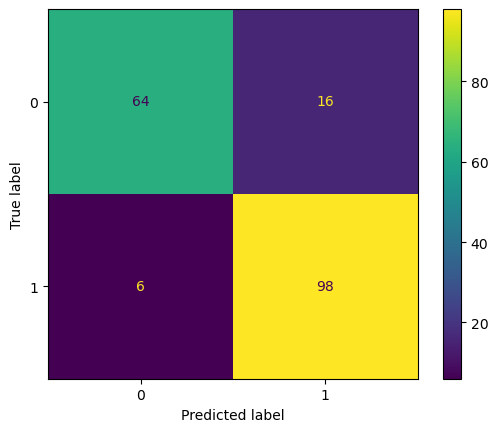

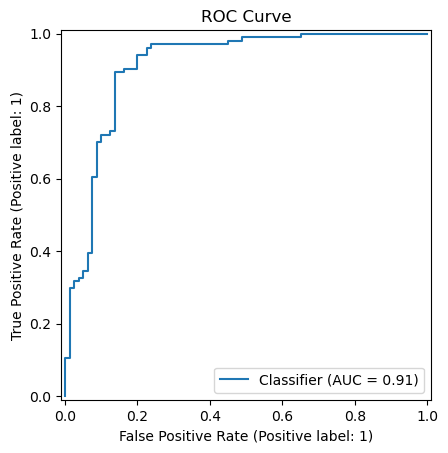

C: 3
              precision    recall  f1-score   support

           0       0.90      0.81      0.86        80
           1       0.87      0.93      0.90       104

    accuracy                           0.88       184
   macro avg       0.88      0.87      0.88       184
weighted avg       0.88      0.88      0.88       184

Cross Validation (mean ± std): 85.01% ± 3.76%
ROC AUC Score: 91.08%
F1 Score: 89.81%


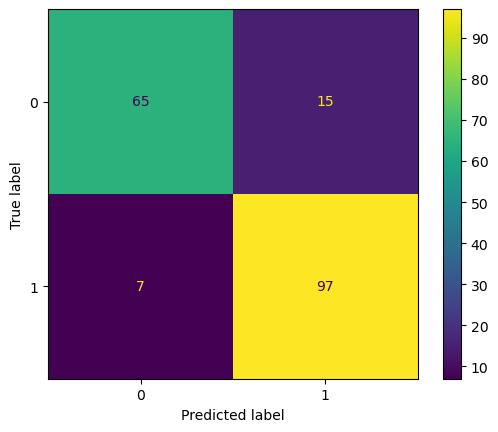

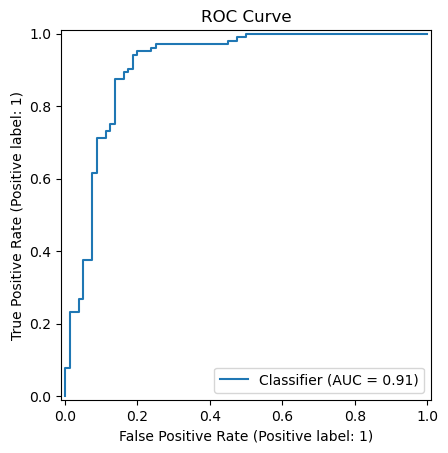

C: 4
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        80
           1       0.86      0.91      0.89       104

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184

Cross Validation (mean ± std): 85.01% ± 3.76%
ROC AUC Score: 91.06%
F1 Score: 88.79%


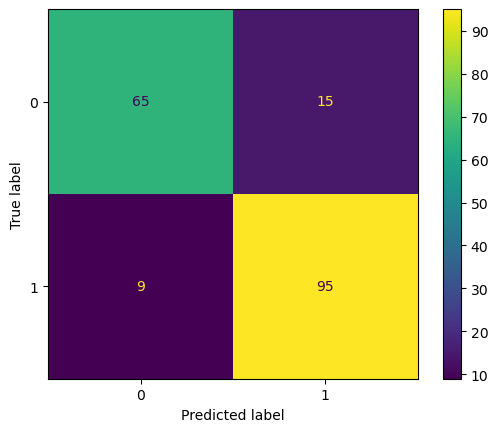

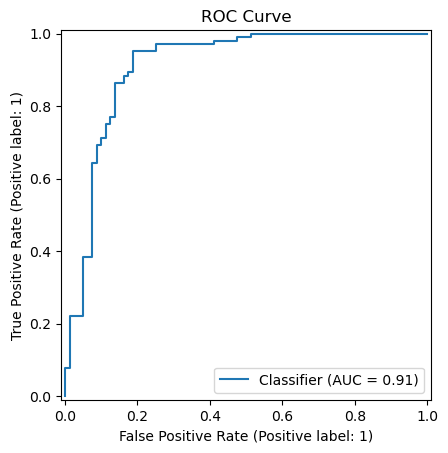

C: 5
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        80
           1       0.86      0.91      0.89       104

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184

Cross Validation (mean ± std): 85.15% ± 3.59%
ROC AUC Score: 90.87%
F1 Score: 88.79%


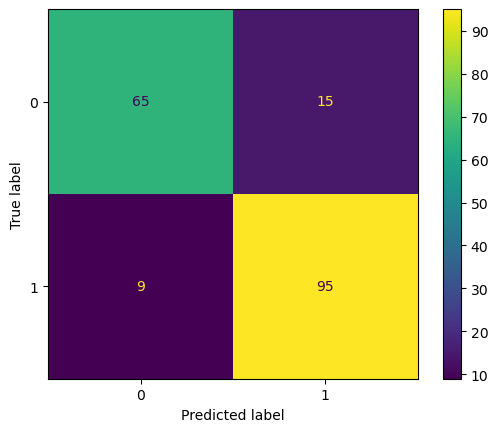

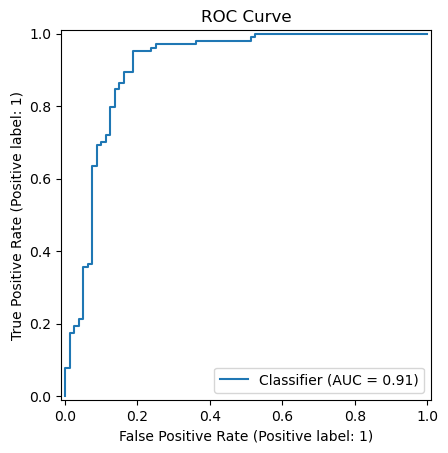

C: 6
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        80
           1       0.86      0.91      0.89       104

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184

Cross Validation (mean ± std): 85.15% ± 3.76%
ROC AUC Score: 90.76%
F1 Score: 88.79%


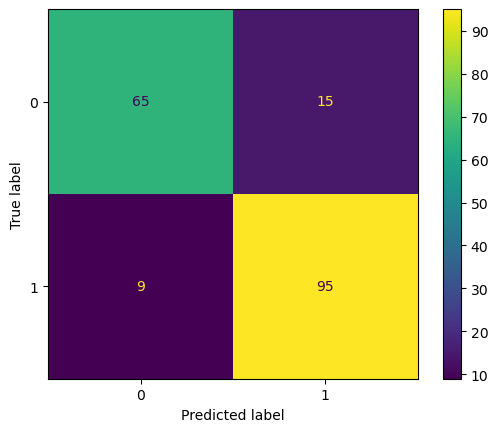

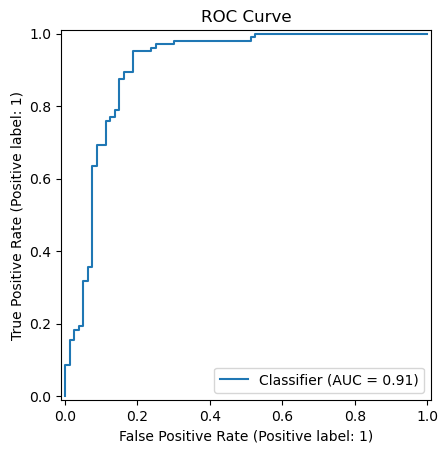

C: 7
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        80
           1       0.86      0.91      0.89       104

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184

Cross Validation (mean ± std): 85.29% ± 4.01%
ROC AUC Score: 90.88%
F1 Score: 88.79%


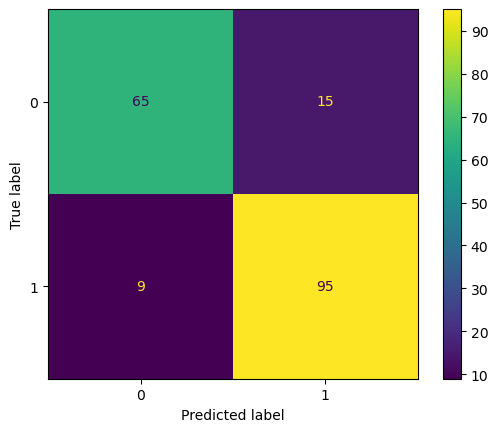

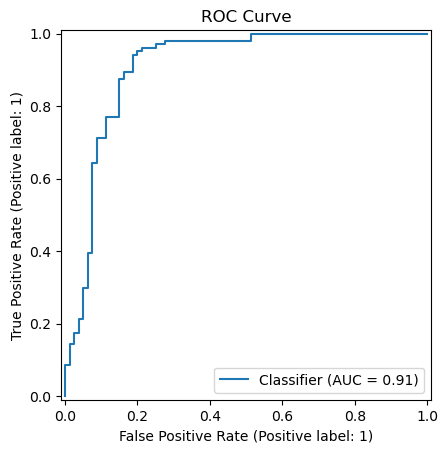

C: 8
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        80
           1       0.86      0.91      0.89       104

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184

Cross Validation (mean ± std): 85.42% ± 3.67%
ROC AUC Score: 90.94%
F1 Score: 88.79%


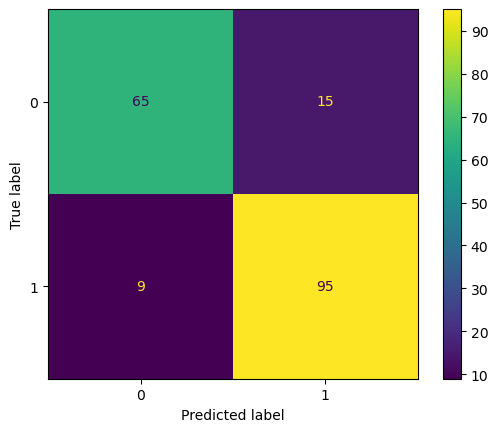

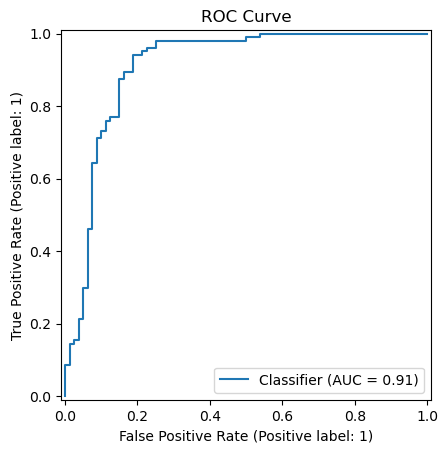

C: 9
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        80
           1       0.86      0.91      0.89       104

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184

Cross Validation (mean ± std): 85.42% ± 4.18%
ROC AUC Score: 91.05%
F1 Score: 88.79%


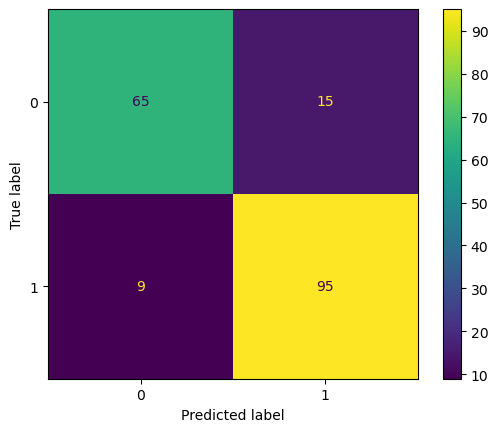

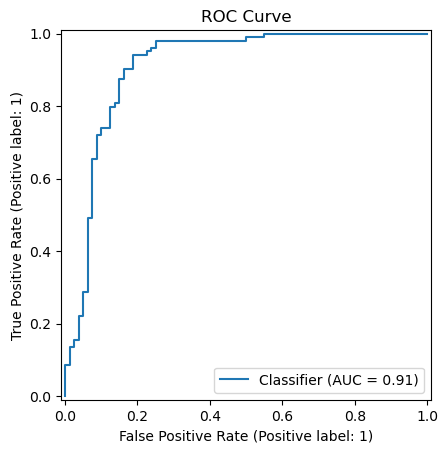

In [48]:
c = []

for i in range(10):
    if i == 0:
        i = 0.1
    print(f"C: {i}")
    classifier = SVC(C=i, kernel='rbf', probability=True)
    c.append(evaluate(classifier)["f1"])


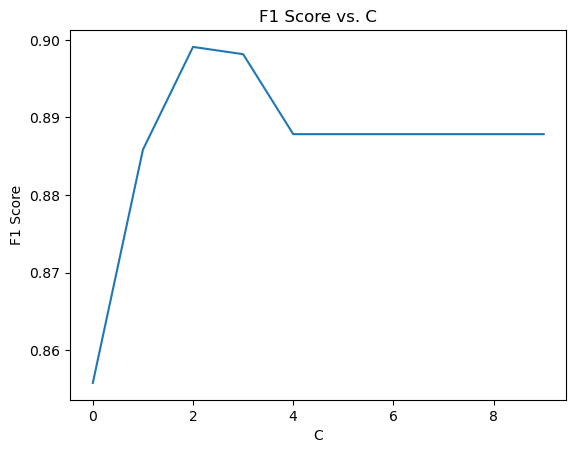

In [49]:
plt.plot(c)
plt.title('F1 Score vs. C')
plt.xlabel('C')
plt.ylabel('F1 Score')
plt.show()

gamma: scale
              precision    recall  f1-score   support

           0       0.88      0.81      0.84        80
           1       0.86      0.91      0.89       104

    accuracy                           0.87       184
   macro avg       0.87      0.86      0.87       184
weighted avg       0.87      0.87      0.87       184

Cross Validation (mean ± std): 85.01% ± 3.76%
ROC AUC Score: 91.06%
F1 Score: 88.79%


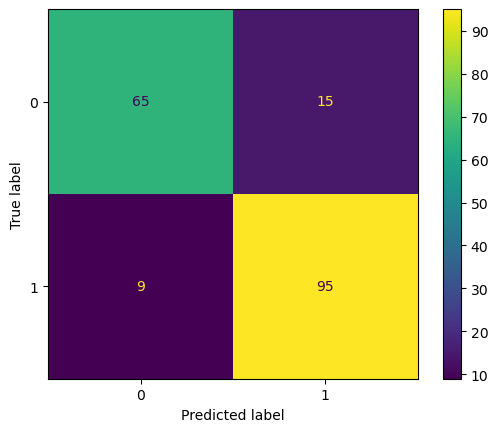

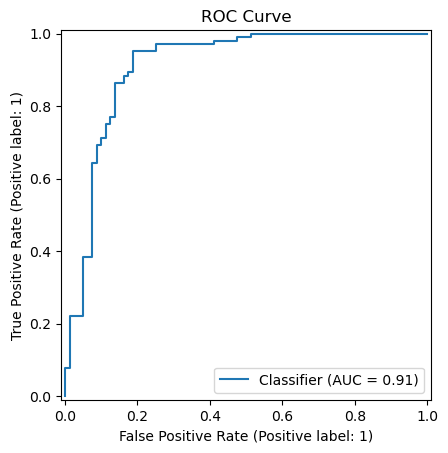

gamma: auto
              precision    recall  f1-score   support

           0       0.87      0.81      0.84        80
           1       0.86      0.90      0.88       104

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Cross Validation (mean ± std): 85.83% ± 4.65%
ROC AUC Score: 89.62%
F1 Score: 88.26%


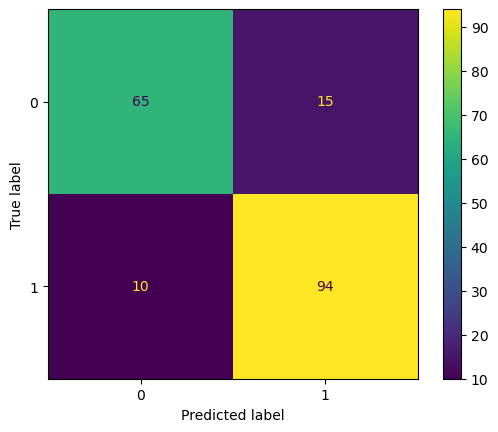

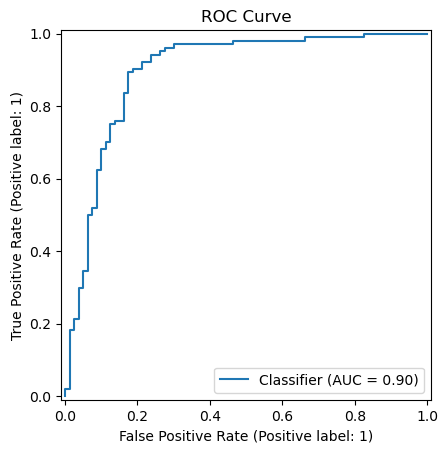

In [50]:
gamma = []
print("gamma: scale")
classifier = SVC(C=4, kernel='rbf', gamma='scale',probability=True)
gamma.append(evaluate(classifier)['f1'])

print("gamma: auto")
classifier = SVC(C=4, kernel='rbf', gamma='auto', probability=True)
gamma.append(evaluate(classifier)['f1'])


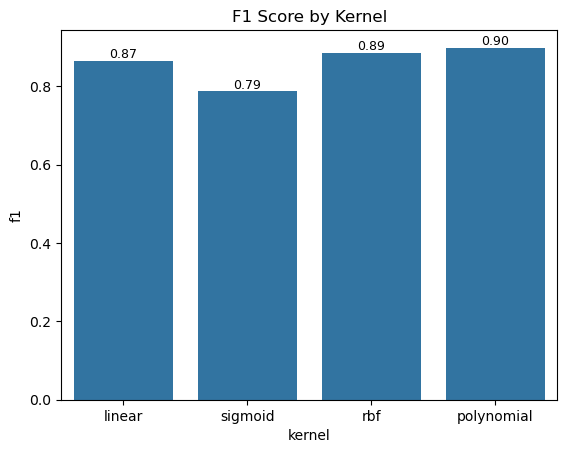

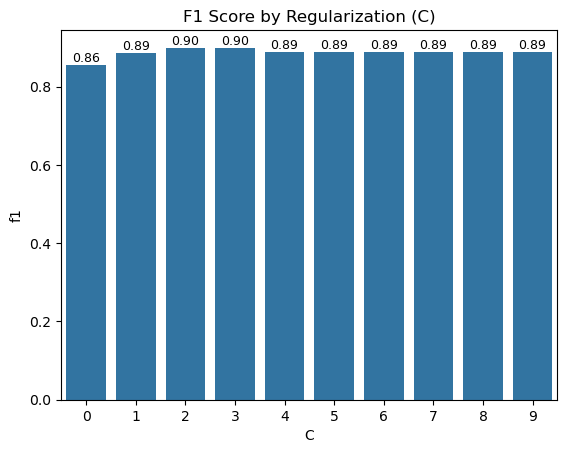

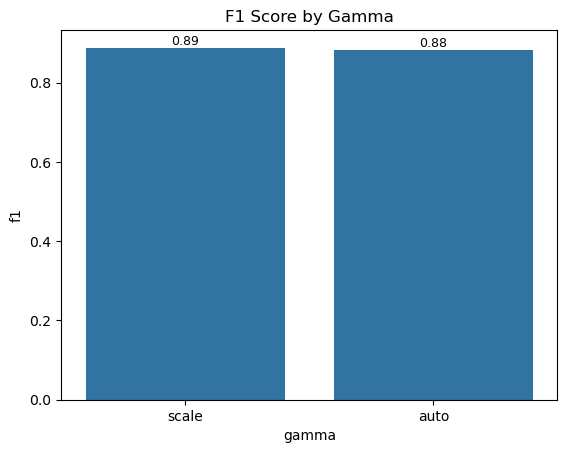

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


kernel_label = ["linear", "sigmoid", "rbf", "polynomial"]
c_label = list(range(10))
gamma_label = ["scale", "auto"]

kernel_results = [{"kernel": label, "f1": kernel[i]} for i, label in enumerate(kernel_label)]
c_results = [{"C": label, "f1": c[i]} for i, label in enumerate(c_label)]
gamma_results = [{"gamma": label, "f1": gamma[i]} for i, label in enumerate(gamma_label)]

df_kernel = pd.DataFrame(kernel_results)
df_c = pd.DataFrame(c_results)
df_gamma = pd.DataFrame(gamma_results)


def plot_bar_with_labels(data, x, y, title):
    ax = sns.barplot(data=data, x=x, y=y)
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=9)
    plt.title(title)
    plt.show()

plot_bar_with_labels(df_kernel, "kernel", "f1", "F1 Score by Kernel")
plot_bar_with_labels(df_c, "C", "f1", "F1 Score by Regularization (C)")
plot_bar_with_labels(df_gamma, "gamma", "f1", "F1 Score by Gamma")

              precision    recall  f1-score   support

           0       0.87      0.80      0.84        86
           1       0.84      0.90      0.87        98

    accuracy                           0.85       184
   macro avg       0.86      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Cross Validation (mean ± std): 87.05% ± 1.80%
ROC AUC Score: 91.71%
F1 Score: 86.70%


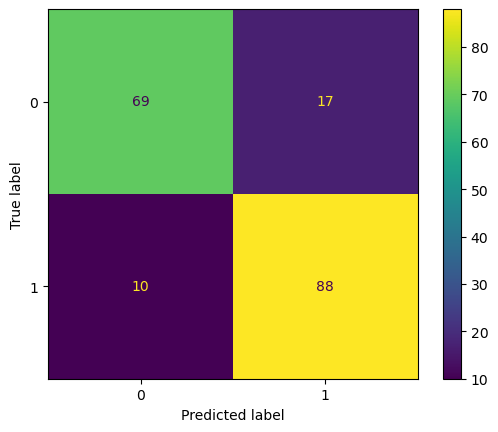

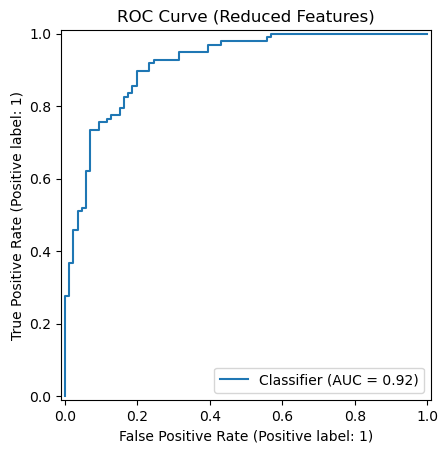

In [52]:
# --- Evaluation after removing low-correlation features: RestingBP and RestingECG ---

# Drop RestingBP and RestingECG
target_reduced = df['HeartDisease'].values
features_reduced = df[df.columns.drop(['HeartDisease', 'RestingBP', 'RestingECG'])].values

# Train-test split with reduced features
x_train_red, x_test_red, y_train_red, y_test_red = train_test_split(features_reduced, target_reduced, test_size=0.20)

# Use existing evaluate function with new data
classifier = SVC(C=4, kernel='rbf', gamma='scale', probability=True)
classifier.fit(x_train_red, y_train_red)

# Evaluate performance
y_pred_red = classifier.predict(x_test_red)
print(classification_report(y_test_red, y_pred_red))

cm = confusion_matrix(y_test_red, y_pred_red)
ConfusionMatrixDisplay(cm).plot()

cv = cross_val_score(classifier, x_train_red, y_train_red)
print(f"Cross Validation (mean ± std): {cv.mean()*100:.2f}% ± {cv.std()*100:.2f}%")

y_proba_red = classifier.predict_proba(x_test_red)[:, 1]
roc_auc_red = roc_auc_score(y_test_red, y_proba_red)
print(f"ROC AUC Score: {roc_auc_red*100:.2f}%")

f1_red = f1_score(y_test_red, y_pred_red)
print(f"F1 Score: {f1_red*100:.2f}%")

RocCurveDisplay.from_predictions(y_test_red, y_proba_red)
plt.title("ROC Curve (Reduced Features)")
plt.show()